# Análisis Descriptivo de la Gestión del negocio: Influenciadores clave

Un análisis descriptivo es un tipo de análisis que se utiliza para explorar y describir los datos, identificar patrones y tendencias y para generar estadísticas y visualizaciones que permitan entender los datos de manera más clara. En este caso, se utilizan las técnicas de correlación y pruebas estadísticas para identificar las variables que influyen en las ventas de la empresa ***AdventureWorks***.

Un análisis descriptivo no pretende hacer predicciones o recomendaciones, sino simplemente brindar una descripción más detallada de los datos y su relación entre ellos.

## Carga de las librerías de python necesarias

In [20]:
#import pyodbc
from sqlalchemy import create_engine  # Conecto con Alchemy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [12, 8]

Las librerías de Python son conjuntos de código predefinido que se utilizan para realizar tareas específicas en el lenguaje de programación Python.
Las librerías se utilizan para diferentes propósitos, como manipulación de datos, análisis de datos, visualización de datos, aprendizaje automático, desarrollo web, entre otros. 

## Extracción de los datos desde SQL Server

In [75]:

#import pyodbc
from sqlalchemy import create_engine  # Conecto con Alchemy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [12, 8]

conn_str = create_engine('mssql+pyodbc://DESKTOP-MAM6T2F/AdventureWorks2019?driver=SQL+Server&Trusted_connection=yes')
"""
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=BALRODJJ;''Database=AdventureWorks2019;''Trusted_Connection=yes;')
"""

input_query = '''select
	 CONCAT_WS('-',YEAR(t1.OrderDate), MONTH(t1.OrderDate)) as 'fecha',
	 sum(t1.TotalDue) as 'ventas',
	 sum(t2.OrderQty) as 'cantidad',
	 count(distinct t1.SalesOrderID) as 'transacciones',
	 sum(t1.TotalDue)/count(distinct t1.SalesOrderID) as 'monto_promedio',
	 sum(t2.OrderQty)/count(distinct t1.SalesOrderID) as 'cantidad_promedio',
	 count(distinct t2.ProductID) as 'variedad',
	 count(distinct t1.CustomerID) as 'clientes',
	 CASE 
		WHEN count(distinct t1.SalesPersonID)<1 THEN 1 ELSE count(distinct t1.SalesPersonID)
		end as 'vendedores'
from Sales.SalesOrderHeader as t1
	Inner join Sales.SalesOrderDetail as t2 on t1.SalesOrderID = t2.SalesOrderID
	group by YEAR(t1.OrderDate), MONTH(t1.OrderDate) 
	order by YEAR(t1.OrderDate), MONTH(t1.OrderDate)'''

sales_data = pd.read_sql(input_query, conn_str)

# Verificando columna fecha
print(sales_data.columns)

print()

# Mostrando las primeras filas del dataFrame
print(sales_data.head())

print()

# Verificando el tipo de datos de las columnas
print(sales_data.dtypes) 

#Convirtiendo 'fecha' a datetime
sales_data['fecha'] = pd.to_datetime(sales_data['fecha'], format='%Y-%m', errors='coerce')
print()

# Verificando si 'fecha' tiene valores  Nat (Not a Time)
print(sales_data['fecha'])

# Eliminar filas con valores 'NaT' en la columna 'fecha'
sales_data.dropna(subset=['fecha'], inplace=True)

# Establecer 'fecha' como índice
#sales_data.set_index('fecha', inplace=True)

#sales_data['ventas_pct_change'] = sales_data['ventas'].pct_change() * 100


Index(['fecha', 'ventas', 'cantidad', 'transacciones', 'monto_promedio',
       'cantidad_promedio', 'variedad', 'clientes', 'vendedores'],
      dtype='object')

    fecha      ventas  cantidad  transacciones  monto_promedio  \
0  2011-5  8094970.21       825             43       188255.12   
1  2011-6   507096.47       141            141         3596.43   
2  2011-7 26081421.01      2209            231       112906.58   
3  2011-8 38009959.61      2904            250       152039.84   
4  2011-9   554791.61       157            157         3533.70   

   cantidad_promedio  variedad  clientes  vendedores  
0                 19        47        43           9  
1                  1        21       141           1  
2                  9        51       231          10  
3                 11        59       250          10  
4                  1        22       157           1  

fecha                 object
ventas               float64
cantidad               int64
transacciones         

### - Explicar linea por linea la query utilizada arriba

EXPLICACION DEL CODIGO LINEA A LINEA:

from sqlalchemy import create_engine  # Conecto con Alchemy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

- SE IMPORTAN LAS LIBRERIAS
- plt.rcParams['figure.figsize'] = [12, 8] # 'figsize' configura el tamaño de los gráficos
Es un diccionario que contiene configuraciones globales para `matplotlib`, una biblioteca de visualización en Python.
- conn_str = create_engine('mssql+pyodbc://DESKTOP-MAM6T2F/AdventureWorks2019?driver=SQL+Server&Trusted_connection=yes')
Es una función de `SQLAlchemy` que crea un objeto de motor de conexión para interactuar con bases de datos. Se pasan como parametros, el servidor de SQL Server y la base de datos 'Adventureworks2019'
- 'input_query' 
Es una variable que almacena la consulta SQL
- sales_data = pd.read_sql(input_query, conn_str)
Es una función de Pandas que ejecuta una consulta SQL y carga el resultado en un DataFrame llamado 'sales_data'


### - Explicar tabla de arriba, por ejemplo: ¿Que significa cada columna?

- fecha:
Combina el año y el mes de la fecha del pedido (OrderDate) en un solo campo con el formato YYYY-MM. Esto representa el período de tiempo mensual para el análisis.
- ventas:
Suma el total de ventas (TotalDue) para cada mes. Representa el valor monetario total de las ventas realizadas en cada mes.
- cantidad:
Suma la cantidad de productos pedidos (OrderQty) para cada mes. Esto muestra el total de unidades vendidas en cada mes.
- transacciones:
Cuenta el número de pedidos únicos (SalesOrderID) para cada mes. Representa la cantidad de transacciones realizadas en cada mes.
- monto_promedio:
Calcula el monto promedio de las ventas por transacción en cada mes dividiendo el total de ventas (TotalDue) por el número de transacciones. Esto indica el valor promedio de cada pedido.
- cantidad_promedio:
Calcula la cantidad promedio de productos pedidos por transacción en cada mes dividiendo el total de productos pedidos (OrderQty) por el número de transacciones. Esto indica cuántas unidades se venden en promedio por pedido.
- variedad:
Cuenta el número de productos distintos (ProductID) vendidos en cada mes. Representa la variedad de productos vendidos en cada mes.
- clientes:
Cuenta el número de clientes únicos (CustomerID) en cada mes. Representa la cantidad de clientes diferentes que realizaron pedidos en cada mes.
- vendedores:
Cuenta el número de vendedores únicos (SalesPersonID) en cada mes. Si no hay vendedores en un mes, se devuelve 1. Representa la cantidad de vendedores que realizaron ventas en cada mes.



### - Aproximar a dos decimales el monto_promedio

In [76]:
sales_data['monto_promedio'] = sales_data['monto_promedio'].round(2)
sales_data

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-05-01,8094970.21,825,43,188255.12,19,47,43,9
1,2011-06-01,507096.47,141,141,3596.43,1,21,141,1
2,2011-07-01,26081421.01,2209,231,112906.58,9,51,231,10
3,2011-08-01,38009959.61,2904,250,152039.84,11,59,250,10
4,2011-09-01,554791.61,157,157,3533.70,1,22,157,1
5,2011-10-01,85739874.81,5382,327,262201.45,16,60,327,10
6,2011-11-01,815313.02,230,230,3544.84,1,23,230,1
7,2011-12-01,10980308.22,1040,228,48159.25,4,51,228,9
8,2012-01-01,57438324.93,3967,336,170947.40,11,51,336,10
9,2012-02-01,17925512.94,1442,219,81851.66,6,58,219,10


### - Efectuar la misma conexión a la base de datos usando SQLAlchemy, usar también la misma query.

---- YA LA HICE DESDE LA PRIMERA CELDA ----
---- COMENTÉ LA CONEXION CON pyodbc

## Exploración del dataset extraído

### - Muestre la información general del dataframe

In [77]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              38 non-null     datetime64[ns]
 1   ventas             38 non-null     float64       
 2   cantidad           38 non-null     int64         
 3   transacciones      38 non-null     int64         
 4   monto_promedio     38 non-null     float64       
 5   cantidad_promedio  38 non-null     int64         
 6   variedad           38 non-null     int64         
 7   clientes           38 non-null     int64         
 8   vendedores         38 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 2.8 KB


### - Muestre los tipos de datos de cada columna:

In [78]:
print(sales_data.dtypes)

fecha                datetime64[ns]
ventas                      float64
cantidad                      int64
transacciones                 int64
monto_promedio              float64
cantidad_promedio             int64
variedad                      int64
clientes                      int64
vendedores                    int64
dtype: object


### - Dimensiones del dataframe (shape)

In [9]:
sales_data.shape

(38, 9)

### - Imprima un resumen de las principales estadisticas descriptivas para el dataframe ventas: count, mean, std, min, 25%,  50%, 75%, max. Explique e interprete la salida. 

In [10]:
sales_data.describe()

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
count,3.800000e+01,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,7.702553e+07,7234.578947,828.026316,147862.879737,11.342105,101.631579,808.842105,11.236842
std,6.051102e+07,5601.450467,796.913149,124012.409291,7.826760,51.404817,769.105536,5.074761
min,1.461499e+05,141.000000,43.000000,155.640000,1.000000,21.000000,43.000000,1.000000
25%,2.606614e+07,2974.000000,287.000000,49202.022500,5.250000,58.250000,287.000000,10.000000
50%,7.756321e+07,5609.000000,384.000000,111793.300000,9.500000,99.500000,384.000000,12.500000
75%,1.215372e+08,10851.750000,1752.000000,259254.020000,17.750000,145.000000,1703.500000,15.750000
max,2.150542e+08,22582.000000,2411.000000,432681.920000,28.000000,196.000000,2350.000000,17.000000


count: cantidad de lineas del DataFrame
mean: Media o promedio por columnas numéricas (campos) del DtaFrame
std: Desviació Standar por columnas, es la desviacion promedio de cada observación rsepecto a la media.
min: valor minimo por columnas
25%, 50%, 75%: Los 'cuartiles', por coulmnas, es decir los valores que representan el 25%, 50% y 75% de las observaciones por columnas
max: el valor maximo por columnas.

### - Aproxime los resultados anteriores a dos decimales aquellas columnas que lo requieran

In [79]:
sales_data = sales_data.round({col: 2 for col in sales_data.select_dtypes(include=['float64', 'int64']).columns})

# Establezco un formato para visualizar los datos en 'pandas'
pd.set_option('display.float_format','{:.2f}'.format)

sales_data

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-05-01,8094970.21,825,43,188255.12,19,47,43,9
1,2011-06-01,507096.47,141,141,3596.43,1,21,141,1
2,2011-07-01,26081421.01,2209,231,112906.58,9,51,231,10
3,2011-08-01,38009959.61,2904,250,152039.84,11,59,250,10
4,2011-09-01,554791.61,157,157,3533.70,1,22,157,1
5,2011-10-01,85739874.81,5382,327,262201.45,16,60,327,10
6,2011-11-01,815313.02,230,230,3544.84,1,23,230,1
7,2011-12-01,10980308.22,1040,228,48159.25,4,51,228,9
8,2012-01-01,57438324.93,3967,336,170947.40,11,51,336,10
9,2012-02-01,17925512.94,1442,219,81851.66,6,58,219,10


### - Imprimir en un objeto tipo Index todas las columnas del dataframe

In [80]:
print(sales_data.columns)

Index(['fecha', 'ventas', 'cantidad', 'transacciones', 'monto_promedio',
       'cantidad_promedio', 'variedad', 'clientes', 'vendedores'],
      dtype='object')


### - Muestre el contenido de las primeras 15 líneas del dataframe

In [81]:
sales_data.head(15)

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
0,2011-05-01,8094970.21,825,43,188255.12,19,47,43,9
1,2011-06-01,507096.47,141,141,3596.43,1,21,141,1
2,2011-07-01,26081421.01,2209,231,112906.58,9,51,231,10
3,2011-08-01,38009959.61,2904,250,152039.84,11,59,250,10
4,2011-09-01,554791.61,157,157,3533.70,1,22,157,1
5,2011-10-01,85739874.81,5382,327,262201.45,16,60,327,10
6,2011-11-01,815313.02,230,230,3544.84,1,23,230,1
7,2011-12-01,10980308.22,1040,228,48159.25,4,51,228,9
8,2012-01-01,57438324.93,3967,336,170947.40,11,51,336,10
9,2012-02-01,17925512.94,1442,219,81851.66,6,58,219,10


### - Muestre las últimas cinco líneas del dataframe

In [82]:
sales_data.tail(5)

,fecha,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores
33,2014-02-01,4094288.46,4287,1756,2331.60,2,109,1713,2
34,2014-03-01,215054247.19,22582,2399,89643.29,9,173,2342,17
35,2014-04-01,5567935.37,5313,2115,2632.59,2,108,2058,1
36,2014-05-01,135352134.47,15884,2411,56139.42,6,166,2350,16
37,2014-06-01,146149.86,2130,939,155.64,2,42,898,1


### Calcular el cambio porcentual (o incremento porcentual) de las ventas mes a mes. Recordar el ejemplo realizado en clase con las acciones de las 'Big Four' del 2010.

In [83]:
sales_data['ventas_pct_change'] = sales_data['ventas'].pct_change() * 100

# Elimino los valores NaN
ventas_pct = sales_data.dropna(subset=['ventas_pct_change'])

# Mostrar la serie de cambios porcentuales sin el indice de la izquierda
print(ventas_pct[['fecha', 'ventas_pct_change']])



        fecha  ventas_pct_change
1  2011-06-01             -93.74
2  2011-07-01            5043.29
3  2011-08-01              45.74
4  2011-09-01             -98.54
5  2011-10-01           15354.43
6  2011-11-01             -99.05
7  2011-12-01            1246.76
8  2012-01-01             423.10
9  2012-02-01             -68.79
10 2012-03-01             174.88
11 2012-04-01             -47.11
12 2012-05-01             357.51
13 2012-06-01              41.53
14 2012-07-01             -16.19
15 2012-08-01             -46.55
16 2012-09-01              61.81
17 2012-10-01             -27.22
18 2012-11-01             -55.32
19 2012-12-01              65.90
20 2013-01-01             -30.72
21 2013-02-01              78.03
22 2013-03-01              45.35
23 2013-04-01             -30.78
24 2013-05-01              56.65
25 2013-06-01              53.00
26 2013-07-01              -1.87
27 2013-08-01             -51.39
28 2013-09-01              43.15
29 2013-10-01               2.27
30 2013-11

### Calcular el promedio de las ventas trimestrales y anuales

In [85]:
import numpy as np
import numpy as np
import pandas as pd

if sales_data.index.name == 'fecha':
    sales_data.reset_index(inplace=True)

sales_data['fecha'] = pd.to_datetime(sales_data['fecha'], format='%Y-%m')
sales_data.set_index('fecha', inplace=True)

ventas_trimestral = sales_data['ventas'].resample('Q').mean()
ventas_anual = sales_data['ventas'].resample('Y').mean()

print('Promedio de ventas trimestral:')
print(ventas_trimestral)
print()
print('Promedio de ventas anual:')
print(ventas_anual)


Promedio de ventas trimestral:
fecha
2011-06-30     4301033.34
2011-09-30    21548724.08
2011-12-31    32511832.02
2012-03-31    41545798.10
2012-06-30   104679766.56
2012-09-30   113105231.29
2012-12-31    64928317.79
2013-03-31    81796318.43
2013-06-30   135471648.12
2013-09-30   140074109.87
2013-12-31    90314018.41
2014-03-31    99791514.56
2014-06-30    47022073.23
Freq: QE-DEC, Name: ventas, dtype: float64

Promedio de ventas anual:
fecha
2011-12-31    21347966.87
2012-12-31    81064778.44
2013-12-31   111914023.70
2014-12-31    73406793.90
Freq: YE-DEC, Name: ventas, dtype: float64


C:\Users\REY\AppData\Local\Temp\ipykernel_20012\4218066674.py:31: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ventas_trimestral = sales_data['ventas'].resample('Q').mean()
C:\Users\REY\AppData\Local\Temp\ipykernel_20012\4218066674.py:32: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ventas_anual = sales_data['ventas'].resample('Y').mean()


In [86]:
if sales_data.index.name == 'fecha':
    sales_data.reset_index(inplace=True)

print(sales_data.columns)

Index(['fecha', 'ventas', 'cantidad', 'transacciones', 'monto_promedio',
       'cantidad_promedio', 'variedad', 'clientes', 'vendedores',
       'ventas_pct_change'],
      dtype='object')


In [87]:
print(sales_data)

        fecha       ventas  cantidad  transacciones  monto_promedio  \
0  2011-05-01   8094970.21       825             43       188255.12   
1  2011-06-01    507096.47       141            141         3596.43   
2  2011-07-01  26081421.01      2209            231       112906.58   
3  2011-08-01  38009959.61      2904            250       152039.84   
4  2011-09-01    554791.61       157            157         3533.70   
5  2011-10-01  85739874.81      5382            327       262201.45   
6  2011-11-01    815313.02       230            230         3544.84   
7  2011-12-01  10980308.22      1040            228        48159.25   
8  2012-01-01  57438324.93      3967            336       170947.40   
9  2012-02-01  17925512.94      1442            219        81851.66   
10 2012-03-01  49273556.43      3184            304       162084.07   
11 2012-04-01  26061041.63      2405            269        96881.20   
12 2012-05-01 119232307.95      7723            293       406936.20   
13 201

## Procesamiento de los datos: Cálculo de la correlación entre las variables

### - Seleccionar solo columnas numéricas del dataframe:

In [88]:
sales_data_numericas = sales_data.select_dtypes(include=[np.number])

# Imprimir el DataFrame con solo las columnas numéricas
print("DataFrame con solo columnas numéricas:")
print(sales_data_numericas)


DataFrame con solo columnas numéricas:
         ventas  cantidad  transacciones  monto_promedio  cantidad_promedio  \
0    8094970.21       825             43       188255.12                 19   
1     507096.47       141            141         3596.43                  1   
2   26081421.01      2209            231       112906.58                  9   
3   38009959.61      2904            250       152039.84                 11   
4     554791.61       157            157         3533.70                  1   
5   85739874.81      5382            327       262201.45                 16   
6     815313.02       230            230         3544.84                  1   
7   10980308.22      1040            228        48159.25                  4   
8   57438324.93      3967            336       170947.40                 11   
9   17925512.94      1442            219        81851.66                  6   
10  49273556.43      3184            304       162084.07                 10   
11  26061041.

### - Imprima la nueva dataset con las columnas numéricas

In [89]:
print(sales_data_numericas)

         ventas  cantidad  transacciones  monto_promedio  cantidad_promedio  \
0    8094970.21       825             43       188255.12                 19   
1     507096.47       141            141         3596.43                  1   
2   26081421.01      2209            231       112906.58                  9   
3   38009959.61      2904            250       152039.84                 11   
4     554791.61       157            157         3533.70                  1   
5   85739874.81      5382            327       262201.45                 16   
6     815313.02       230            230         3544.84                  1   
7   10980308.22      1040            228        48159.25                  4   
8   57438324.93      3967            336       170947.40                 11   
9   17925512.94      1442            219        81851.66                  6   
10  49273556.43      3184            304       162084.07                 10   
11  26061041.63      2405            269        9688

### - Calcular la correlación, imprima la matriz de correlación.

In [90]:
correlation = sales_data_numericas.corr()
correlation

,ventas,cantidad,transacciones,monto_promedio,cantidad_promedio,variedad,clientes,vendedores,ventas_pct_change
ventas,1.00,0.91,0.34,0.52,0.56,0.79,0.34,0.76,0.11
cantidad,0.91,1.00,0.70,0.15,0.22,0.91,0.70,0.74,0.06
transacciones,0.34,0.70,1.00,-0.47,-0.42,0.69,1.00,0.34,-0.01
monto_promedio,0.52,0.15,-0.47,1.00,0.98,0.14,-0.47,0.35,0.10
cantidad_promedio,0.56,0.22,-0.42,0.98,1.00,0.23,-0.42,0.42,0.06
variedad,0.79,0.91,0.69,0.14,0.23,1.00,0.69,0.75,-0.09
clientes,0.34,0.70,1.00,-0.47,-0.42,0.69,1.00,0.35,-0.01
vendedores,0.76,0.74,0.34,0.35,0.42,0.75,0.35,1.00,0.03
ventas_pct_change,0.11,0.06,-0.01,0.10,0.06,-0.09,-0.01,0.03,1.00


### Graficar la matriz de correlación siguiendo el estilo de un mapa de calor:

### - Explicar línea por línea el siguiente código:

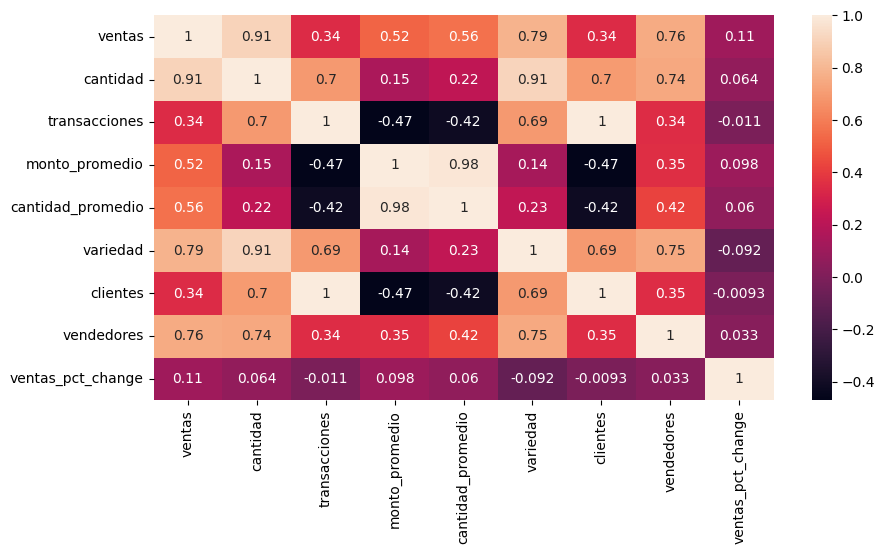

In [92]:
plt.figure(figsize=(10,5))
sns.heatmap(sales_data_numericas[correlation.index].corr(), annot=True)
plt.show()

EXPLICACION LINEA A LINEA DEL CODIGO ANTERIOR:

plt.figure(figsize=(10,5)): 
Define el tamaño de la figura en pulgadas.

sns.heatmap(sales_data_numericas[correlation.index].corr(), annot=True)
- 'sales_data_numericas[correlation.index]': Este fragmento selecciona columnas del DataFrame sales_data_numericas cuyos nombres están en el índice de correlation.
- '.corr()': El método .corr() calcula la matriz de correlación de las columnas seleccionadas. 
- 'annot=True': Mostrar los valores en las celdas del 'mapa de calor'

plt.show(): Esta función muestra la figura y el grafico en pantalla.


### - Describa y explique la salida (la matriz de correlación) anterior

- En el 'Mapa de Calor' se muestra una matriz de correlación donde los colores más intensos indican los coeficientes de correlación más bajos y los colores mas claro, los coeficientes de correlación más altos, asi pues, uno se colorea como blanco.

- Se puede observar además correlaciones 'muy altas' entre:
  . monto_promedio vs. cantidad_promedio
  . ventas vs. cantidad
  . cantidad vs. variedad 

Correlaciones 'altas' entre:
  . ventas vs. variedad
  . ventas vs. vendedores
  . cantidad vs. vendedores
  . cantidad vs. cientes
  . cantidad vs. transacciones
  . transacciones vs. variedad
  . clientes vs. variedad
  . vendedores vs. variedad
  . vendedores vs. cantidad
  . vendedores vs. ventas
  
Correlaciones 'discretas' entre:
  . ventas vs. monto_promedio
  . cantidad_promedio vs. ventas

El resto de las correlaciones de la Matriz considero que son 'bajos' aunque la ultima palabra lo da el analisis de significación estadistica con las pruebas de t-Student individual por factores y la prueba general F-Fischer y Snedecor, además del analisis del cumplimiento de los supuestos en la regresión lineal para determinar si el Modelo es MELI (Mejores Estimadores Lineales Insesgados)  

### Selección de las variables más correlacionadas con las ventas

In [99]:
import numpy as np

correlation = sales_data_numericas.corr()
correlation_ventas = correlation["ventas"].sort_values(ascending=False)
correlation_ventas


ventas              1.00
cantidad            0.91
variedad            0.79
vendedores          0.76
cantidad_promedio   0.56
monto_promedio      0.52
clientes            0.34
transacciones       0.34
ventas_pct_change   0.11
Name: ventas, dtype: float64

### Explicar el código dado arriba

EXPLICACION
- Se muestra una 'Matriz de correlación' donde se observan correlaciones fuertes con respecto a la columna de 'ventas', es decir, 'ventas' tiene correlacion 'muy alta' con las variables:
 . cantidad - 0.91

- Correlacion 'alta' con las variables:
 . variedad - 0.79
 . vendedores - 0.76

- Correlación 'dispcreta' con las variables:
 . cantidad_promedio - 0.56
 . monto_promedio - 0.52

- El resto considero que las correlaciones son 'bajas'

Nota: Estos análisis deben hacerse en función tambien del contexto y semantica de las variables a relacionar.

Tambien las corelaciones altas solo dan indicios para la inlcusión o nó de las variables en el modelo de regresión pero no definen si estas variables son significativas para el modelo para esto habría que realizar lo que expliqué en el 'mapa de calor'

### - Visualización gráfica de las variables correlacionadas

### - Explicar linea por línea el siguiente código:

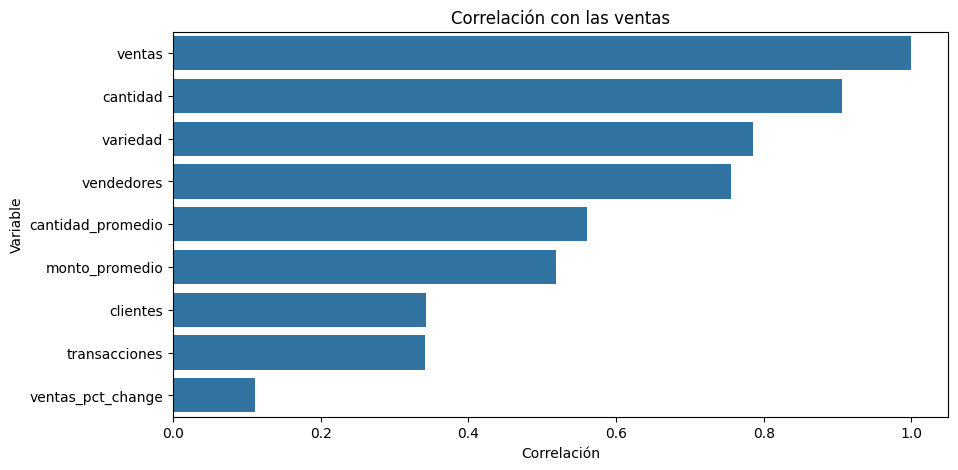

In [101]:
plt.figure(figsize=(10,5))
sns.barplot(x=correlation_ventas.values, y=correlation_ventas.index)
plt.title("Correlación con las ventas")
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.show()

EXPLICACION DEL CODIGO:

- plt.figure(figsize=(10,5)):
Establece el tamaño del gráfico en pulgadas

- sns.barplot(x=correlation.values, y=correlation.index)
Crea un gráfico de barras donde los valores de las barras son los valores de correlación y las etiquetas de las barras son los nombres de las variables.

- plt.title("Correlación con las ventas")
Añade eltítulo del gráfico

- plt.xlabel("Correlación")
Añade la etiqueta del eje 'X'

- plt.ylabel("Variable")
Añade la etiqueta del eje 'Y'

- plt.show()
Muestra el gráfico en pantalla


### - Interpretar el plot de arriba

E plot de arriba es una manera de mostrar en forma de barras horizontales la corrrelación de la variable 'ventas' con respecto al resto de las variables numericas del DataFrame. Mostrando las barras en 'orden descendente'

Por ejemplo: 
- La primera barra 'ventas' en el eje 'Y' está corrrelacionada con ella misma, por lo que su coeficiente es '1'.

- La segunda de arriba hacia abajo 'cantidad' está correlacionada con 'ventas' y su coeficiente es '0.91' como se detalla en la matriz de correlación.

Y asi sucede en la interpretación del resto de las variables del DataFrame.


### - Seleccionar las variables mas correlacionadas,  esta vez con monto_promedio

In [103]:
import numpy as np

correlation = sales_data_numericas.corr()
correlation_monto = correlation["monto_promedio"].sort_values(ascending=False)
correlation_monto

monto_promedio       1.00
cantidad_promedio    0.98
ventas               0.52
vendedores           0.35
cantidad             0.15
variedad             0.14
ventas_pct_change    0.10
clientes            -0.47
transacciones       -0.47
Name: monto_promedio, dtype: float64

### - Visualización gráfica de las variables correlacionadas con monto_promedio

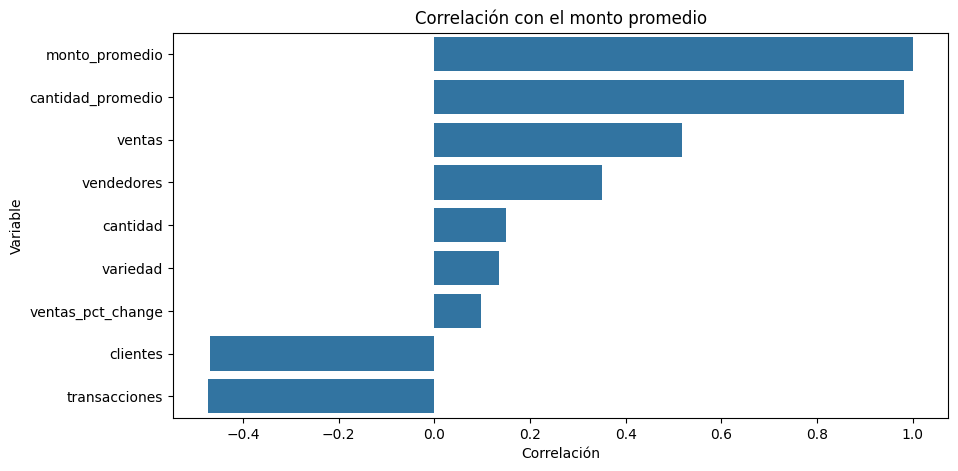

In [104]:
plt.figure(figsize=(10,5))
sns.barplot(x=correlation_monto.values, y=correlation_monto.index)
plt.title("Correlación con el monto promedio")
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.show()

## Pruebas formales para determinar la influencia de cada variable en las ventas

Las pruebas formales se refieren a un conjunto de técnicas estadísticas y matemáticas que se utilizan para validar las hipótesis y afirmaciones hechas sobre los datos en un estudio o análisis.

Asimismo, las pruebas formales son una parte importante del análisis de datos ya que permiten tomar decisiones basadas en evidencia sólida en lugar de basarse únicamente en la intuición o el juicio subjetivo. 

Estas pruebas ayudan a los investigadores a determinar si los patrones o relaciones observados en los datos son estadísticamente significativos o simplemente el resultado del azar.

### - Explicar línea por línea el siguiente código:

In [128]:
from scipy import stats
import numpy as np

# Lista para almacenar los resultados
influencers_venta = []

# Iterar sobre las columnas numéricas del DataFrame
for variable in sales_data_numericas.columns:
    if variable != "ventas":  # No comparar 'ventas' consigo misma
        # Extraer las series para 'ventas' y la variable actual
        x = sales_data_numericas["ventas"]
        y = sales_data_numericas[variable]
        
        # Verificar que no haya valores NaN o infinitos
        if not (np.any(np.isnan(x)) or np.any(np.isnan(y)) or np.any(np.isinf(x)) or np.any(np.isinf(y))):
            # Calcular el valor p y la correlación
            corr, p_value = stats.pearsonr(x, y)
            
            # Determinar si es significativo
            if p_value <= 0.05:
                influencers_venta.append((variable, corr, "Significativo"))
            else:
                influencers_venta.append((variable, corr, "No significativo"))
        else:
            influencers_venta.append((variable, "Datos inválidos", "No significativo"))

# Imprimir los resultados
print("Variables influyentes y su correlación con las ventas:")
for influencer in influencers_venta:
    print(influencer)

# Se imprime una tupla por variables que incluye;: variable correlacionada con venta, coef. de #correlación, Significación estadistica)


Variables influyentes y su correlación con las ventas:
('cantidad', 0.9022333748517953, 'Significativo')
('transacciones', 0.31949023268849125, 'No significativo')
('monto_promedio', 0.5389128583911436, 'Significativo')
('cantidad_promedio', 0.6104932952722552, 'Significativo')
('variedad', 0.7787140216849013, 'Significativo')
('clientes', 0.321887310851505, 'No significativo')
('vendedores', 0.758003288116962, 'Significativo')
('ventas_pct_change', 0.11065338114193257, 'No significativo')


EXPLICACION DEL CODIGO ANTERIOR:

-influencers = []:
Inicializa la lista 'influencers'

- for variable in correlation.index:
Itera sobre cada variable en el 'índice de correlación'

- p_value, corr = stats.pearsonr(numeric_sales_data["ventas"], numeric_sales_data[variable])
Utiliza la función pearsonr del módulo stats de scipy para calcular el coeficiente de correlación de Pearson (corr) entre la variable "ventas" y la variable actual (variable). También calcula el valor p (p_value), que indica la significancia estadística de la correlación.

- if p_value <= 0.05:
    influencers.append((variable, corr))
elif p_value > 0.05:
    influencers.append((variable, corr, "No significativo"))

'p_value' es la 'probabilidad marginal' que se compara con el valor '0.05' o '5%' que establece la zona de rechazo de la hipótesis 'Ho' que dice que los estimadores son igual a cero, si 'p_value < 0.05' se rechaza la hipótesis nula, por lo que la variable analizada es significativa en el modelo y se agrega una tupla a la lista influencers ( influencers.append((variable, corr)) )    

### - Utlizar código de arriba pero tomando como referencia la varible monto_promedio

In [127]:
from scipy import stats
import numpy as np

# Lista para almacenar los resultados
influencers_monto = []

# Iterar sobre las columnas numéricas del DataFrame
for variable in sales_data_numericas.columns:
    if variable != "monto_promedio":  # No comparar 'monto_promedio' consigo misma
        # Extraer las series para 'ventas' y la variable actual
        x = sales_data_numericas["monto_promedio"]
        y = sales_data_numericas[variable]
        
        # Verificar que no haya valores NaN o infinitos
        if not (np.any(np.isnan(x)) or np.any(np.isnan(y)) or np.any(np.isinf(x)) or np.any(np.isinf(y))):
            # Calcular el valor p y la correlación
            corr, p_value = stats.pearsonr(x, y)
            
            # Determinar si es significativo
            if p_value <= 0.05:
                influencers_monto.append((variable, corr, "Significativo"))
            else:
                influencers_monto.append((variable, corr, "No significativo"))
        else:
            influencers_monto.append((variable, "Datos inválidos", "No significativo"))

# Imprimir los resultados
print("Variables influyentes y su correlación con el monto_promedio:")
for influencer in influencers_monto:
    print(influencer)

# Se imprime una tupla por variables que incluye;: variable correlacionada con monto_promedio, coef. de correlación, Significación estadistica)
    


Variables influyentes y su correlación con el monto_promedio:
('ventas', 0.5389128583911436, 'Significativo')
('cantidad', 0.16439128426221852, 'No significativo')
('transacciones', -0.4700465201288712, 'Significativo')
('cantidad_promedio', 0.9864091700818644, 'Significativo')
('variedad', 0.14808227312532424, 'No significativo')
('clientes', -0.4672427485413156, 'Significativo')
('vendedores', 0.35672058791907724, 'Significativo')
('ventas_pct_change', 0.09816984821026303, 'No significativo')


### Impresión de los resultados

=== El el codigo de las variables influencer incluyo la impresion de los resultados ===

### - Explicar línea por línea el siguiente código:  

In [131]:
print("Variables influyentes en las ventas:")
for variable, corr, significance in influencers_venta:
    if len(influencers_venta) > 2:
        print(f"{variable}: correlación = {corr:.2f} ({significance})")
    else:
        print(f"{variable}: correlación = {corr:.2f}")

Variables influyentes en las ventas:
cantidad: correlación = 0.90 (Significativo)
transacciones: correlación = 0.32 (No significativo)
monto_promedio: correlación = 0.54 (Significativo)
cantidad_promedio: correlación = 0.61 (Significativo)
variedad: correlación = 0.78 (Significativo)
clientes: correlación = 0.32 (No significativo)
vendedores: correlación = 0.76 (Significativo)
ventas_pct_change: correlación = 0.11 (No significativo)


EXPLICACION DEL CODIGO ANTERIOR LINEA A LINEA:

- print("Variables influyentes en las ventas:")
Se muestra un título

-for variable, corr, significance in influencers:
Itera sobre cada elemento de la lista influencers.
que es una tupla con los elementos (variable, corr, significacion)
'significacion' indica si la variable es significativa o no

- if len(influencers) > 2:
    print(f"{variable}: correlación = {corr:.2f} ({significance})")
else:
    print(f"{variable}: correlación = {corr:.2f}")

Verifica si la longitud de la lista influencers es mayor a 2. Esto se usa para determinar si se deben mostrar o no las etiquetas de significancia en la salida.
Si la 'significacion' es mayor de '2' se imprime el nombre de la variable, la el coeficiente de correlación y si es significativa o no. Si es '2' o menor de '2' solo imprime el nombre de la variable y la etiqueta de significación.

Se puede observar en la impresión el formato de salida a dos decimales


Se agregó una comprobación de la hipótesis nula antes de imprimir los resultados de la prueba de correlación. La hipótesis nula establece que no existe una correlación entre las variables, y se rechaza si el **valor p es menor que 0,05**. 

### - Rehacer el código de arriba pero usando monto_promedio

In [132]:
print("Variables influyentes en las ventas:")
for variable, corr, significance in influencers_monto:
    if len(influencers_monto) > 2:
        print(f"{variable}: correlación = {corr:.2f} ({significance})")
    else:
        print(f"{variable}: correlación = {corr:.2f}")

Variables influyentes en las ventas:
ventas: correlación = 0.54 (Significativo)
cantidad: correlación = 0.16 (No significativo)
transacciones: correlación = -0.47 (Significativo)
cantidad_promedio: correlación = 0.99 (Significativo)
variedad: correlación = 0.15 (No significativo)
clientes: correlación = -0.47 (Significativo)
vendedores: correlación = 0.36 (Significativo)
ventas_pct_change: correlación = 0.10 (No significativo)


## Conclusiones

Ninguna de las variables analizadas tiene una correlación significativa con las ventas de la empresa. En otras palabras, el análisis indica que no hay una relación clara entre las variables y las ventas de la empresa. 

Es importante tener en cuenta que la falta de correlación no necesariamente significa que las variables no son importantes para el negocio, ya que pueden haber otros factores que afecten las ventas que no se están considerando en este análisis. 

Por lo tanto, es necesario realizar más análisis y considerar otros factores para comprender mejor las tendencias de las ventas de la empresa.

## Recomendaciones

A partir de los resultados y las conclusiones de que ninguna de las variables analizadas tiene una correlación significativa con las ventas de la empresa, se pueden dar las siguientes recomendaciones:

* *Ampliar el análisis*: Es importante considerar que el análisis realizado solo incluyó un conjunto limitado de variables y no consideró otros factores importantes que podrían estar influyendo en las ventas de la empresa. Se recomienda realizar un análisis más amplio e incluir otras variables relevantes que puedan tener un impacto en las ventas, como la satisfacción del cliente, la calidad de los productos, la competencia en el mercado, entre otros.

* *Realizar encuestas a los clientes*: Realizar encuestas a los clientes puede ser una buena manera de obtener información sobre los factores que los motivan a comprar y los aspectos que consideran importantes al momento de realizar una compra. Esta información puede ayudar a la empresa a identificar áreas de oportunidad y mejorar su estrategia de ventas.

* *Realizar análisis de la competencia*: Analizar a la competencia puede ser útil para entender mejor el mercado y conocer las tendencias del mismo. Además, puede ayudar a la empresa a identificar estrategias exitosas de la competencia que puedan ser aplicables a su negocio.

* *Implementar estrategias de marketing*: Aunque las variables analizadas no mostraron una correlación significativa con las ventas, implementar estrategias de marketing puede ser útil para incrementar la exposición de la empresa y atraer a nuevos clientes. Las estrategias de marketing pueden incluir publicidad en línea, redes sociales, promociones y descuentos, entre otros.